<a href="https://colab.research.google.com/github/soleymanevienne/Databricks-Accidents-Project/blob/main/VIENNE_HADBI_TP_NOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Étude de cas : prévoir l'arrivée de la pluie

- Étudiant(s) : Vienne Soleymane Habdi Souleymane
- Objectif et rendu

- L’objectif est d’étudier la capacité des arbres de décision et des forêts aléatoires à prédire, à partir de mesures réalisées un jour J, l’arrivée de la pluie le jour J+1.

1. **Chargement des data :**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#Exercice 1-1
df_import = pd.read_csv('projet (1).csv', sep=',')
print(df_import.head())
print(df_import.describe())

   TempMin  TempMax  Précipitations  Évaporation  Ensoleillement  \
0      0.6     16.0             0.0          5.8            10.0   
1     19.7     28.4             0.0          7.4             6.0   
2     23.3     38.5             4.8         10.4            10.0   
3     10.8     19.7             0.0          5.2             4.8   
4      8.9     21.8             0.0          1.6            10.1   

   VitesseRafales  VitesseVent9h  VitesseVent15h  Humidité9h  Humidité15h  \
0            35.0           19.0            20.0        55.0         41.0   
1            35.0           11.0            17.0        67.0         64.0   
2            57.0           24.0             9.0        46.0         27.0   
3            35.0           11.0            13.0        72.0         56.0   
4            37.0           13.0             7.0        61.0         30.0   

   ...  DirectionVent15h_S  DirectionVent15h_SE  DirectionVent15h_SSE  \
0  ...                   0                    0        

Ces données représente des indicateur météo

1. **TempMin et TempMax :** Températures minimale et maximale en degrés Celsius.
2. **Précipitations :** Quantité de précipitations en millimètres.
3. **Évaporation :** Mesure de l'évaporation en millimètres.
4. **Ensoleillement :** Nombre d'heures d'ensoleillement.
5. **VitesseRafales :** Vitesse maximale des rafales de vent en kilomètres par heure.
6. **VitesseVent9h et VitesseVent15h :** Vitesse du vent à 9h et 15h en kilomètres par heure.
7. **Humidité9h et Humidité15h :** Pourcentage d'humidité à 9h et 15h.
8. **DirectionVent9h et DirectionVent15h :** Direction du vent à 9h et 15h.
9. **Les colonnes binaires (DirectionVent9h_N, DirectionVent9h_NE, ..., DirectionVent15h_O) :** Ces colonnes binaire indiquent la direction du vent avec des valeurs 0 ou 1, probablement codées pour chaque point cardinal.

Quant aux statistiques :

- **Count (Nombre d'observations) :** Le nombre d'entrées dans le jeu de données.
- **Mean (Moyenne) :** La moyenne des valeurs pour chaque colonne.
- **Std (Écart-type) :** L'écart-type, une mesure de la dispersion des valeurs.
- **Min (Minimum) et Max (Maximum) :** Les valeurs minimales et maximales.
- **25%, 50%, 75% :** Les percentiles, indiquant la valeur en dessous de laquelle se trouvent respectivement 25%, 50%, et 75% des données.

In [ ]:
#Exercice 1-2
colonnes_a_garder = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,49,50]
df = df_import.iloc[:, colonnes_a_garder]
print(df.head())

   TempMin  TempMax  Précipitations  Évaporation  Ensoleillement  \
0      0.6     16.0             0.0          5.8            10.0   
1     19.7     28.4             0.0          7.4             6.0   
2     23.3     38.5             4.8         10.4            10.0   
3     10.8     19.7             0.0          5.2             4.8   
4      8.9     21.8             0.0          1.6            10.1   

   VitesseRafales  VitesseVent9h  VitesseVent15h  Humidité9h  Humidité15h  \
0            35.0           19.0            20.0        55.0         41.0   
1            35.0           11.0            17.0        67.0         64.0   
2            57.0           24.0             9.0        46.0         27.0   
3            35.0           11.0            13.0        72.0         56.0   
4            37.0           13.0             7.0        61.0         30.0   

   Pression9h  Pression15h  Couverture9h  Couverture15h  Temp9h  Temp15h  \
0      1028.1       1026.4           1.0            

3. **Préparer les échantillons :**
   - Ici nous allons divisez nos donnée en un échantillon d'netrainement (60 %), un échantillon de validation (20 %) et enfin un échantillon de teste (20 %)

In [ ]:
#Exercice 1-3
df_train, df_temp, = train_test_split(df, test_size=0.6, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

### Prédiction par arbre de décision

1. **Construire l'arbre complet sur l'échantillon d'entraînement :**
   - Nous allons ici nous servir de l'échantillon d'entrainement pour construire l'arbre complet.
   - On vas évaluez cet arbre sur l'échantillon de validation.

In [ ]:
#Exercice 2-1
X_train = df_train.drop('PluieDemain', axis=1)
y_train = df_train['PluieDemain']
# Création de l'arbre de décision
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

*Ce code crée un classificateur d'arbres de décision avec une graine aléatoire fixée à 42, ce qui garantit la reproductibilité des résultats. Ce modèle peut ensuite être ajusté (entraîné) sur des données d'entraînement à l'aide de la méthode `fit`. Une fois ajusté, le modèle peut être utilisé pour faire des prédictions sur de nouvelles données à l'aide de la méthode `predict`.*

2. **Montrer que l'arbre complet est parfaitement ajusté :**
   - Ici on vas montrez que l'arbre est parfaitement ajusté aux données d'entraînement.

In [ ]:
#Exercice 2-2
# Évaluation sur l'échantillon de validation
X_val = df_val.drop('PluieDemain', axis=1)
y_val_true = df_val['PluieDemain']
y_val_pred = tree_classifier.predict(X_val)
# Mesures de performance
arbre = DecisionTreeClassifier()
arbre.fit(X_train, y_train)
print(f"Taux d'erreur sur l'ensemble d'entrainement : {round((1 - arbre.score(X_train, y_train))*100,2)}%")

Taux d'erreur sur l'ensemble d'entrainement : 0.0%


*Dans notre cas pour montrer que notre code est ajusté on mesure le taux d'erreur , un taux d'erreur de 0 % signifie que cette arbre est parfaitement ajuster a nos données d'entrainement*

3. **Construire et évaluer un arbre de profondeur au plus 3 :**
   - Nous allons construire un arbre de profondeur maximale 3, avec des feuilles couvrant au moins 500 individus.
   - on cree un visuel de l'arbre.
   - Enfin on écrira deux règles issues de cet arbre.

Accuracy sur l'échantillon de validation : 0.8233382570162482


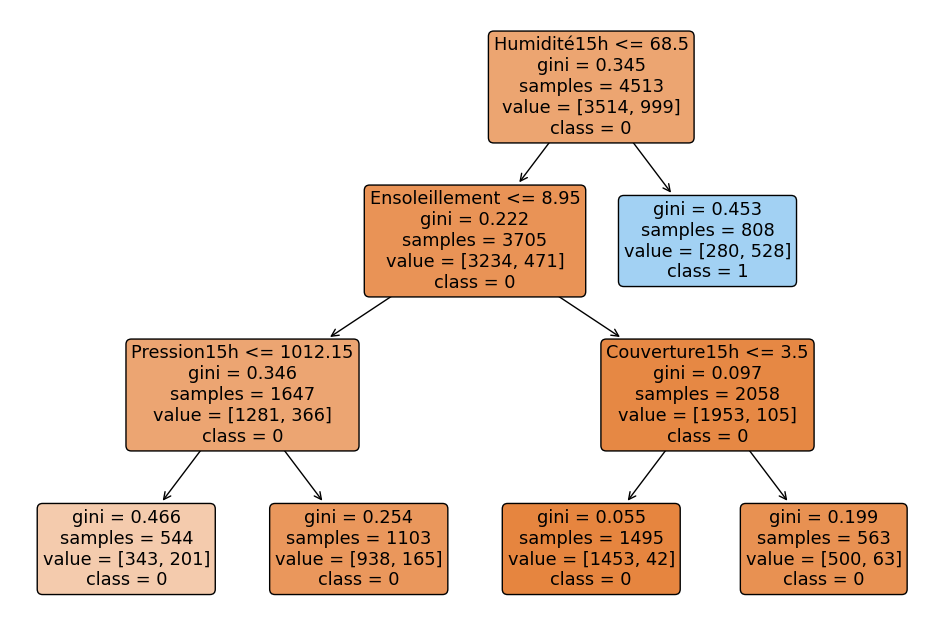

In [ ]:
# Exercice 2-3
tree_classifier_v2 = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=500)
tree_classifier_v2.fit(X_train, y_train)
# Évaluation sur l'échantillon de validation
y_val_pred_v2 = tree_classifier_v2.predict(X_val)
# Mesures de performance pour le nouvel arbre
accuracy_v2 = accuracy_score(y_val_true, y_val_pred_v2)  # Utilisez y_val_pred_v2 ici
# Affichage des résultats pour le nouvel arbre
print(f'Accuracy sur l\'échantillon de validation : {accuracy_v2}')
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier_v2, feature_names=list(X_train.columns), class_names=['0', '1'], filled=True, rounded=True)
plt.show()


- Le nœud racine (en haut) utilise la variable "Humidité15h <= 68.5". Cela suggère que le modèle commence par vérifier si la mesure de l'humidité à 15 heures est inférieure ou égale à 68,5. Si oui, il suit le branchement à gauche, sinon le branchement à droite.
- Chaque nœud indique une "pureté" basée sur l'indice de Gini. Un indice de Gini de 0 signifie une pureté parfaite (tous les échantillons dans un nœud appartiennent à une seule classe), tandis qu'une valeur plus proche de 1 indique une impureté plus élevée.
- Les "samples" indiquent le nombre d'échantillons dans chaque nœud.
- La "value" est un tableau montrant la répartition des classes parmi les échantillons dans le nœud. Par exemple, "value = [3514, 999]" signifie qu'il y a 3514 échantillons de la classe 0 et 999 échantillons de la classe 1.
- La "classe" est la classification prédominante dans ce nœud. Si on poursuit le branchement gauche, la classe dominante est 0, et sur le branchement droit, on a un exemple où la classe dominante est 1.
- En regardant les feuilles de l'arbre (les nœuds finaux sans enfants), vous pouvez voir quelles conditions conduisent à chaque classe. Par exemple, si l'humidité est inférieure ou égale à 68,5 et que l'ensoleillement est inférieur ou égal à 8,95, et que la pression à 15 heures est inférieure ou égale à 1012,15, alors avec un indice de Gini de 0,466, la classe prédite est 0 avec 544 échantillons, dont la valeur est [343, 201], indiquant que la majorité des échantillons sont de la classe 0.

*En résumé, le modele de cette arbre permet de prédire une classe basée sur les conditions des variables à un moment spécifique de la journée. Il est utile pour diviser un ensemble de données en groupes plus homogènes en termes de caractéristiques de sortie (classe 0 ou classe 1 dans ce cas).*

4. **Construire et évaluer un arbre avec l'entropie de Shannon :**
   - Nous allon ici construire un arbre avec les mêmes contraintes, mais en utilisant l'entropie de Shannon comme mesure d'impureté.

In [ ]:
#Exercice 2-4
# Création d'un nouvel arbre avec les mêmes contraintes, mais avec l'entropie de Shannon
tree_classifier_v3 = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=500)
tree_classifier_v3.fit(X_train, y_train)
# Évaluation sur l'échantillon de validation
y_val_pred_v3 = tree_classifier_v3.predict(X_val)
# Mesures de performance pour le nouvel arbre
accuracy_v3 = accuracy_score(y_val_true, y_val_pred_v3)
# Affichage des résultats pour le nouvel arbre
print(f'Accuracy sur l\'échantillon de validation (avec entropie de Shannon) : {accuracy_v3}')

Accuracy sur l'échantillon de validation (avec entropie de Shannon) : 0.8115214180206795


*Une accuracy de 0.8115 sur l'échantillon de validation indique que, pour cet arbre de décision construit avec l'entropie de Shannon, environ 81.15 % des prédictions sur l'échantillon de validation étaient correctes.L'évolution du F1-score en fonction de la profondeur maximale de l'arbre et du seuil de cardinalité des feuilles peut nous aider à comprendre comment ces deux hyperparamètres influencent les performances du modèle.*


5. **Évolution du F1-score selon la profondeur et le seuil de cardinalité des feuilles :**
   - NOus allons utiliser des graphiques pour montrer l'évolution du F1-score pour la modalité "oui" en fonction de la profondeur maximale de l'arbre, pour différents seuils de cardinalité des feuilles.

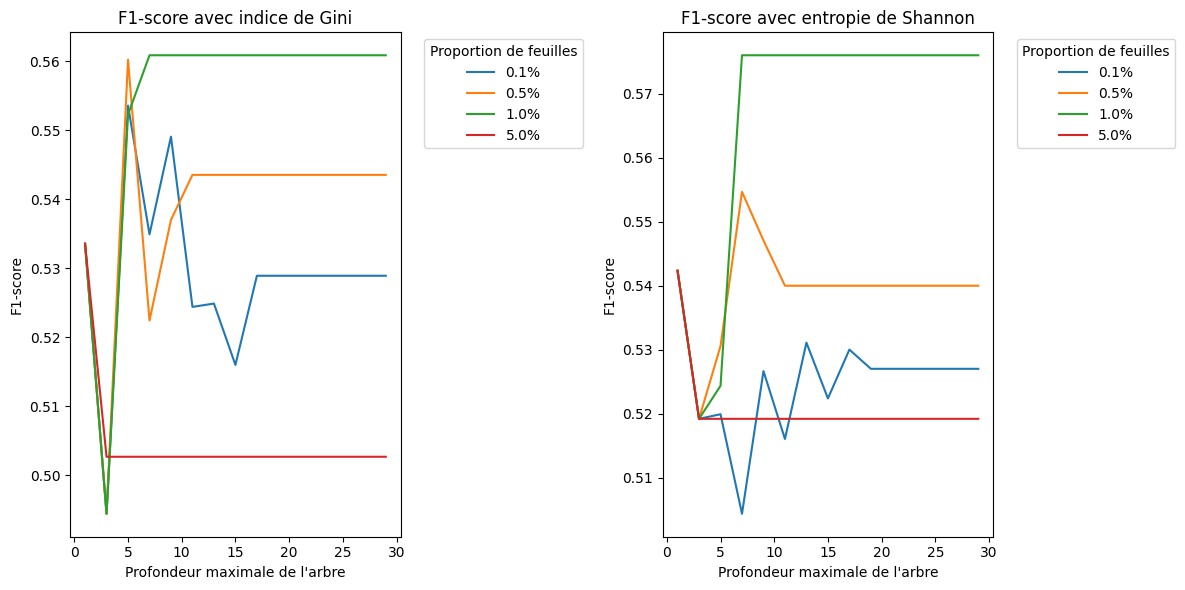

In [ ]:
# Exercice 2-5
# Paramètres à tester
max_depth_values = []
for i in range(30):
    if i % 2 != 0:
        max_depth_values.append(i)
leaf_proportions = [0.001, 0.005, 0.01, 0.05]
# Initialisation des listes pour stocker les résultats
f1_scores_gini = []
f1_scores_entropy = []
# Boucle sur la profondeur maximale de l'arbre
for max_depth in max_depth_values:
    f1_scores_gini_depth = []
    f1_scores_entropy_depth = []
    # Boucle sur les seuils de la cardinalité des feuilles
    for leaf_proportion in leaf_proportions:
        # Création de l'arbre avec indice de Gini
        tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), random_state=42)
        tree_gini.fit(X_train, y_train)
        y_val_pred_gini = tree_gini.predict(X_val)
        f1_gini = f1_score(y_val_true, y_val_pred_gini, pos_label='oui')
        f1_scores_gini_depth.append(f1_gini)
        # Création de l'arbre avec entropie de Shannon
        tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), random_state=42)
        tree_entropy.fit(X_train, y_train)
        y_val_pred_entropy = tree_entropy.predict(X_val)
        f1_entropy = f1_score(y_val_true, y_val_pred_entropy, pos_label='oui')
        f1_scores_entropy_depth.append(f1_entropy)
    # Stockage des résultats pour cette profondeur
    f1_scores_gini.append(f1_scores_gini_depth)
    f1_scores_entropy.append(f1_scores_entropy_depth)
# Conversion des listes en tableaux numpy pour un accès plus facile
f1_scores_gini = np.array(f1_scores_gini)
f1_scores_entropy = np.array(f1_scores_entropy)
# Création des graphiques
plt.figure(figsize=(12, 6))
# Graphique pour l'indice de Gini
plt.subplot(1, 2, 1)
for i, leaf_proportion in enumerate(leaf_proportions):
    plt.plot(max_depth_values, f1_scores_gini[:, i], label=f'{leaf_proportion * 100:.1f}%')

plt.title('F1-score avec indice de Gini')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend(title='Proportion de feuilles', bbox_to_anchor=(1.05, 1), loc='upper left')
# Graphique pour l'entropie de Shannon
plt.subplot(1, 2, 2)
for i, leaf_proportion in enumerate(leaf_proportions):
    plt.plot(max_depth_values, f1_scores_entropy[:, i], label=f'{leaf_proportion * 100:.1f}%')

plt.title('F1-score avec entropie de Shannon')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend(title='Proportion de feuilles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- Le graphique de gauche  montre le score F1 obtenu avec l'indice de Gini en fonction de la profondeur de l'arbre.
*On constate que le score F1 augmente généralement avec la profondeur de l'arbre. Mais par contre l'augmentation est moins marqué lorsque la profondeur est plus élevées.*

- Le graphique de droite montre le score F1 obtenu avec l'entropie de Shannon en fonction de la profondeur de l'arbre. On constate une évolution similaire avec l'indice de gini

*Le seuil de cardinalité est un paramètre qui contrôle la taille des feuilles de l'arbre. Une valeur élevée du seuil de cardinalité signifie que les feuilles de l'arbre ne doivent contenir qu'un nombre limité de données.*

*Les deux graphiques montrent que le score F1 est généralement plus élevé pour des seuils de cardinalité élevés. Cela s'explique par le fait que les arbres avec des feuilles plus petites sont plus précis.*

*En conclusion, l'image montre que la profondeur et le seuil de cardinalité sont des paramètres importants qui affectent le score F1 d'un modèle de classification. Une profondeur élevée et un seuil de cardinalité élevé peuvent améliorer la précision du modèle, mais ils peuvent également entraîner une perte de rappel.*

6. **Incorporer le déséquilibre des classes :**
   - Refaites les graphiques en incorporant le déséquilibre des classes dans les mesures d'impureté.
   - Choisissez la mesure d'impureté pour la suite de l'étude.

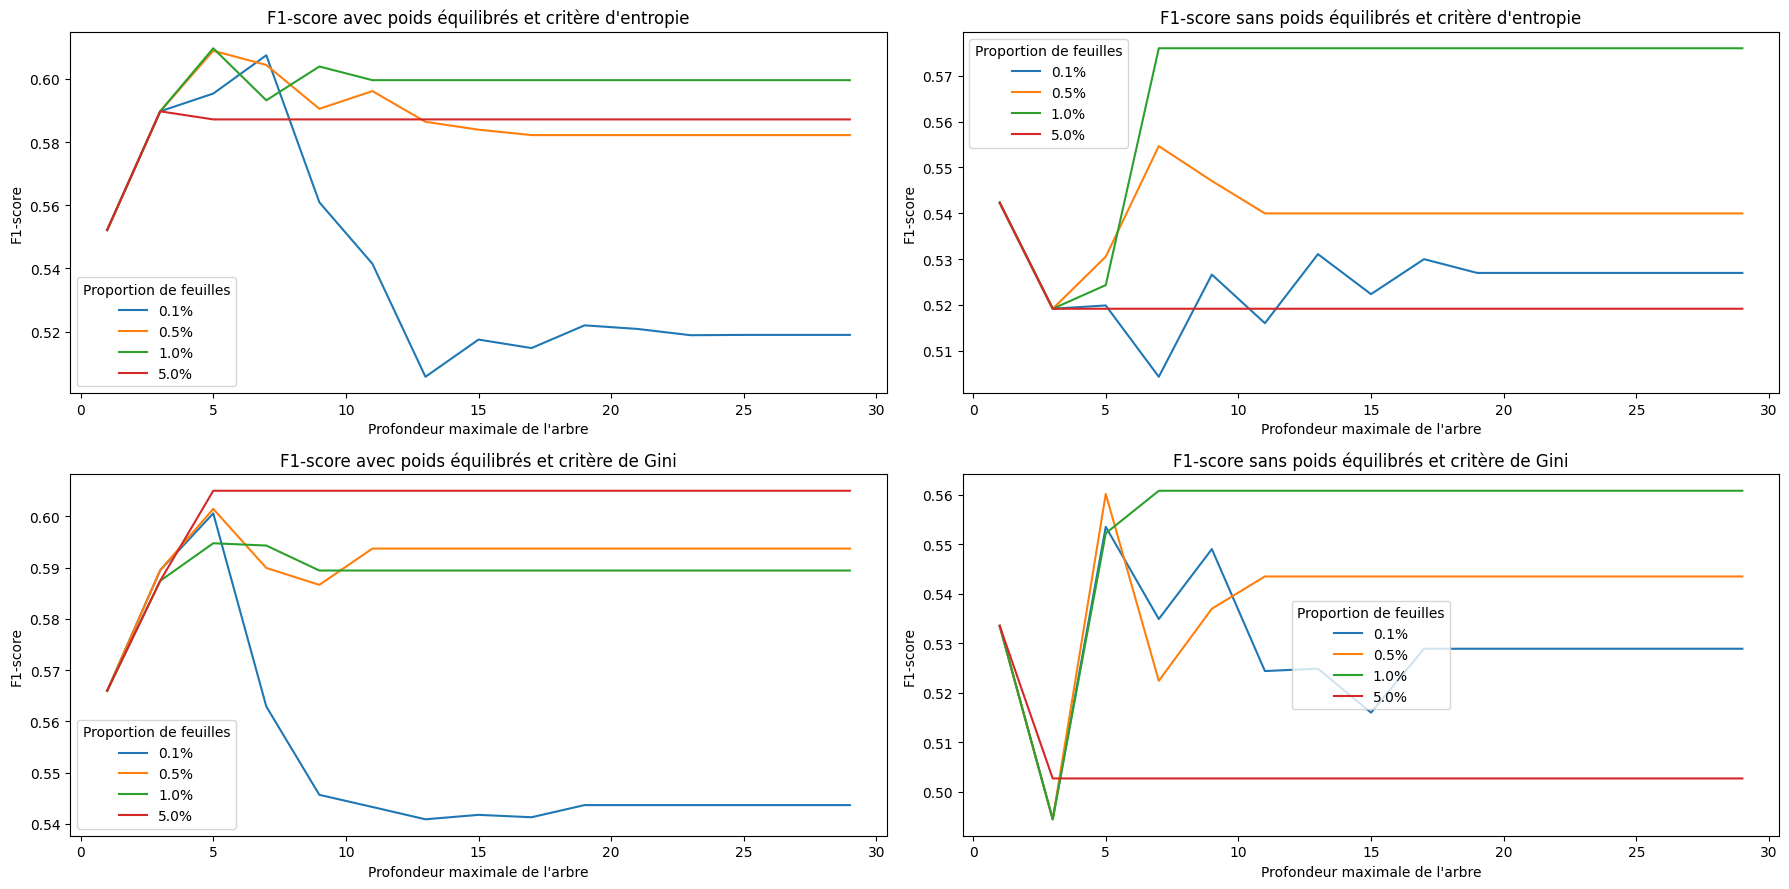

In [ ]:
# Exercice 2-6
class_weights = ['balanced', None]  # 'balanced' ajuste automatiquement les poids
# Initialisation des listes pour stocker les résultats
f1_scores_weighted_entropy = []
f1_scores_unweighted_entropy = []
f1_scores_weighted_gini = []  # Nouvelle liste pour la méthode de Gini
f1_scores_unweighted_gini = []  # Nouvelle liste pour la méthode de Gini

# Boucle sur la profondeur maximale de l'arbre
for max_depth in max_depth_values:
    f1_scores_weighted_depth_entropy = []
    f1_scores_unweighted_depth_entropy = []
    f1_scores_weighted_depth_gini = []  # Nouvelle liste pour la méthode de Gini
    f1_scores_unweighted_depth_gini = []  # Nouvelle liste pour la méthode de Gini

    # Boucle sur les seuils de la cardinalité des feuilles
    for leaf_proportion in leaf_proportions:
        # Création de l'arbre avec poids équilibrés et critère d'entropie
        tree_weighted_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight='balanced', random_state=42)
        tree_weighted_entropy.fit(X_train, y_train)
        y_val_pred_weighted_entropy = tree_weighted_entropy.predict(X_val)
        f1_weighted_entropy = f1_score(y_val_true, y_val_pred_weighted_entropy, pos_label='oui')
        f1_scores_weighted_depth_entropy.append(f1_weighted_entropy)

        # Création de l'arbre sans poids équilibrés et critère d'entropie
        tree_unweighted_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight=None, random_state=42)
        tree_unweighted_entropy.fit(X_train, y_train)
        y_val_pred_unweighted_entropy = tree_unweighted_entropy.predict(X_val)
        f1_unweighted_entropy = f1_score(y_val_true, y_val_pred_unweighted_entropy, pos_label='oui')
        f1_scores_unweighted_depth_entropy.append(f1_unweighted_entropy)

        # Création de l'arbre avec poids équilibrés et critère de Gini
        tree_weighted_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight='balanced', random_state=42)
        tree_weighted_gini.fit(X_train, y_train)
        y_val_pred_weighted_gini = tree_weighted_gini.predict(X_val)
        f1_weighted_gini = f1_score(y_val_true, y_val_pred_weighted_gini, pos_label='oui')
        f1_scores_weighted_depth_gini.append(f1_weighted_gini)

        # Création de l'arbre sans poids équilibrés et critère de Gini
        tree_unweighted_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight=None, random_state=42)
        tree_unweighted_gini.fit(X_train, y_train)
        y_val_pred_unweighted_gini = tree_unweighted_gini.predict(X_val)
        f1_unweighted_gini = f1_score(y_val_true, y_val_pred_unweighted_gini, pos_label='oui')
        f1_scores_unweighted_depth_gini.append(f1_unweighted_gini)

    # Stockage des résultats pour cette profondeur
    f1_scores_weighted_entropy.append(f1_scores_weighted_depth_entropy)
    f1_scores_unweighted_entropy.append(f1_scores_unweighted_depth_entropy)
    f1_scores_weighted_gini.append(f1_scores_weighted_depth_gini)
    f1_scores_unweighted_gini.append(f1_scores_unweighted_depth_gini)

# Conversion des listes en tableaux numpy pour un accès plus facile
f1_scores_weighted_entropy = np.array(f1_scores_weighted_entropy)
f1_scores_unweighted_entropy = np.array(f1_scores_unweighted_entropy)
f1_scores_weighted_gini = np.array(f1_scores_weighted_gini)
f1_scores_unweighted_gini = np.array(f1_scores_unweighted_gini)

# Création des graphiques
plt.figure(figsize=(18, 9))

# Graphique avec poids équilibrés et critère d'entropie
plt.subplot(2, 2, 1)
for i, leaf_proportion in enumerate(leaf_proportions):
    plt.plot(max_depth_values, f1_scores_weighted_entropy[:, i], label=f'{leaf_proportion * 100:.1f}%')
plt.title('F1-score avec poids équilibrés et critère d\'entropie')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend(title='Proportion de feuilles')

# Graphique sans poids équilibrés et critère d'entropie
plt.subplot(2, 2, 2)
for i, leaf_proportion in enumerate(leaf_proportions):
    plt.plot(max_depth_values, f1_scores_unweighted_entropy[:, i], label=f'{leaf_proportion * 100:.1f}%')
plt.title('F1-score sans poids équilibrés et critère d\'entropie')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend(title='Proportion de feuilles')

# Graphique avec poids équilibrés et critère de Gini
plt.subplot(2, 2, 3)
for i, leaf_proportion in enumerate(leaf_proportions):
    plt.plot(max_depth_values, f1_scores_weighted_gini[:, i], label=f'{leaf_proportion * 100:.1f}%')
plt.title('F1-score avec poids équilibrés et critère de Gini')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend(title='Proportion de feuilles')

# Graphique sans poids équilibrés et critère de Gini
plt.subplot(2, 2, 4)
for i, leaf_proportion in enumerate(leaf_proportions):
    plt.plot(max_depth_values, f1_scores_unweighted_gini[:, i], label=f'{leaf_proportion * 100:.1f}%')
plt.title('F1-score sans poids équilibrés et critère de Gini')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend(title='Proportion de feuilles')

plt.tight_layout()
plt.show()


**Interprétation du graphique**

*Le graphique représente l'évolution du score F1 de notre modèle de classification en fonction de la profondeur maximale de l'arbre (en abscisse) et du seuil de cardinalité (en ordonnée).*


*L'image montre que la profondeur et le seuil de cardinalité sont des paramètres importants qui affectent le score F1 d'un modèle de classification. Une profondeur élevée et un seuil de cardinalité élevé peuvent améliorer la précision du modèle, mais ils peuvent également entraîner une perte de rappel.*

*L'incorporation du déséquilibre des classes est une technique importante qui peut améliorer la performance des modèles de classification dans les cas de déséquilibre des classes.*


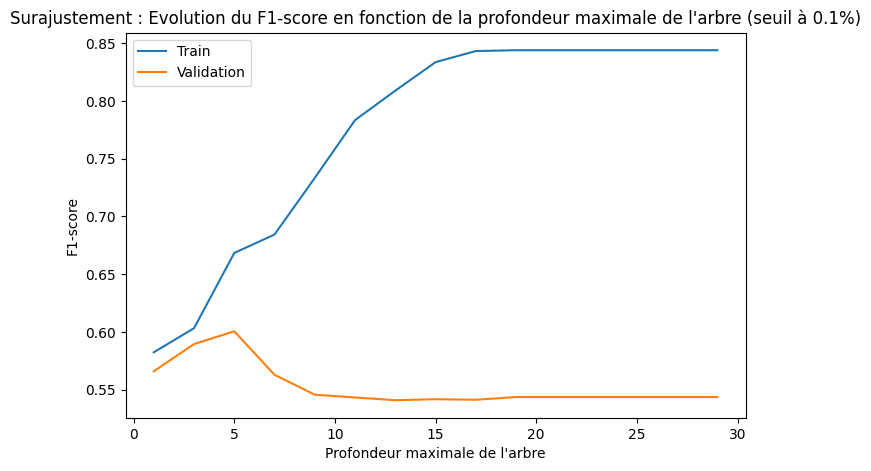

In [ ]:
#Exercice 2-7
leaf_proportion = 0.001  # Seuil sur la cardinalité des feuilles à 0,1%
# Initialisation des listes pour stocker les résultats
f1_scores_train = []
f1_scores_val = []
# Boucle sur la profondeur maximale de l'arbre
for max_depth in max_depth_values:
    # Création de l'arbre
    tree = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight='balanced', random_state=42)
    # Entraînement sur l'échantillon d'entraînement
    tree.fit(X_train, y_train)
    # Prédiction sur l'échantillon d'entraînement
    y_train_pred = tree.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred, pos_label='oui')
    f1_scores_train.append(f1_train)
    # Prédiction sur l'échantillon de validation
    y_val_pred = tree.predict(X_val)
    f1_val = f1_score(y_val_true, y_val_pred, pos_label='oui')
    f1_scores_val.append(f1_val)
# Conversion des listes en tableaux numpy pour un accès plus facile
f1_scores_train = np.array(f1_scores_train)
f1_scores_val = np.array(f1_scores_val)
# Création du graphique
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, f1_scores_train, label='Train')
plt.plot(max_depth_values, f1_scores_val, label='Validation')
plt.title('Surajustement : Evolution du F1-score en fonction de la profondeur maximale de l\'arbre (seuil à 0.1%)')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend()
plt.show()

8. **Réalisation pour un seuil de 1 %:**
   - Ici nous allons réalisez un graphique illustrant le sur-ajustement en comparant l'évolution du F1-score sur l'échantillon d'entraînement
   - et sur l'échantillon de validation en fonction de la profondeur maximale de l'arbre, avec un seuil de cardinalité des feuilles à 0,1% et 1%.

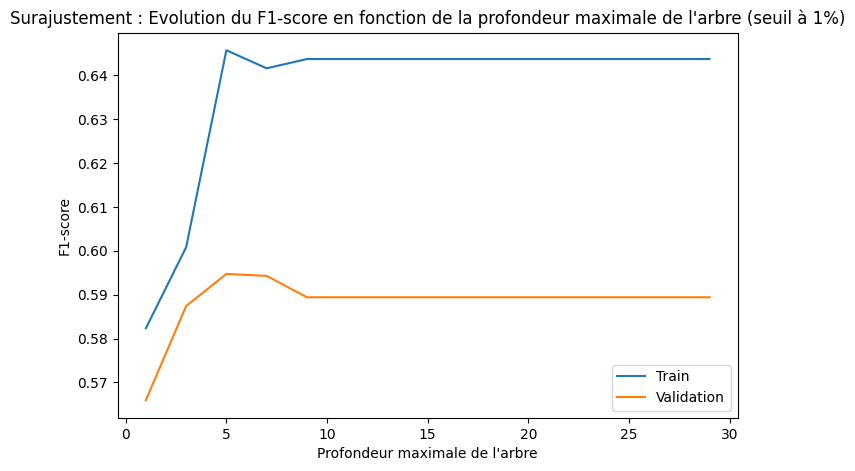

In [ ]:
#Exercice 2-8
leaf_proportion = 0.01  # Seuil sur la cardinalité des feuilles à 1%
# Initialisation des listes pour stocker les résultats
f1_scores_train = []
f1_scores_val = []
# Boucle sur la profondeur maximale de l'arbre
for max_depth in max_depth_values:
    # Création de l'arbre
    tree = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight='balanced', random_state=42)
    # Entraînement sur l'échantillon d'entraînement
    tree.fit(X_train, y_train)
    # Prédiction sur l'échantillon d'entraînement
    y_train_pred = tree.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred, pos_label='oui')
    f1_scores_train.append(f1_train)
    # Prédiction sur l'échantillon de validation
    y_val_pred = tree.predict(X_val)
    f1_val = f1_score(y_val_true, y_val_pred, pos_label='oui')
    f1_scores_val.append(f1_val)
# Conversion des listes en tableaux numpy pour un accès plus facile
f1_scores_train = np.array(f1_scores_train)
f1_scores_val = np.array(f1_scores_val)
# Création du graphique
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, f1_scores_train, label='Train')
plt.plot(max_depth_values, f1_scores_val, label='Validation')
plt.title('Surajustement : Evolution du F1-score en fonction de la profondeur maximale de l\'arbre (seuil à 1%)')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('F1-score')
plt.legend()
plt.show()

### Prédiction par forêt aléatoire

1. **Évolution du F1-score pour des forêts de 10, 50 et 200 arbres :**
   - ici nous allons réalisez des graphiques décrivant l'évolution du F1-score sur l'échantillon de validation pour des forêts de 10, 50 et 200 arbres, avec des seuils de 0,5% et 1% sur la cardinalité des feuilles.

Le point maximal (0.6446) est atteint par la forêt 'Forêt de 50 arbres, Seuil 0.5%' avec un seuil de 0.5% et un nombre d'arbres de 20.


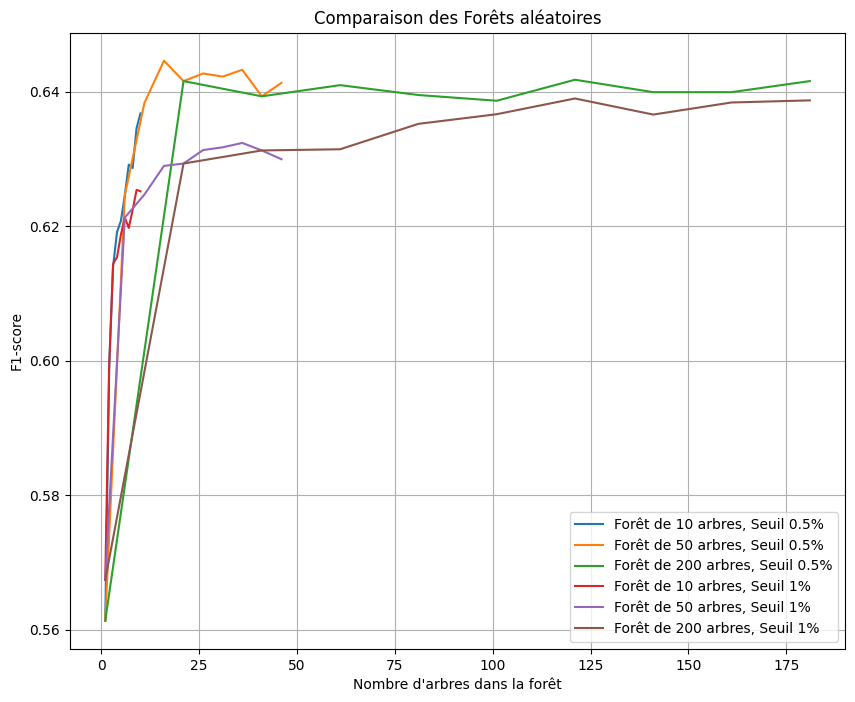

In [ ]:
# Exercice 3-1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

def plot_forest_graph(param_combinations, X_train, y_train, X_val, y_val_true):
    # Initialisation de la figure
    plt.figure(figsize=(10, 8))

    max_point = 0  # Pour stocker le point maximal
    best_forest = None
    best_threshold = None
    best_n_trees = None

    # Boucle sur les combinaisons de paramètres
    for n_estimators, leaf_proportion, title in param_combinations:
        # Initialisation des listes pour stocker les résultats
        f1_scores_forest = []

        # Augmentation du pas pour réduire le nombre d'itérations
        step = max(1, n_estimators // 10)

        # Boucle sur le nombre d'arbres dans la forêt
        for n_trees in range(1, n_estimators + 1, step):
            # Création de la forêt avec poids équilibrés
            forest = RandomForestClassifier(n_estimators=n_trees, criterion='gini', min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight='balanced', random_state=42)
            forest.fit(X_train, y_train)
            y_val_pred_forest = forest.predict(X_val)
            f1_forest = f1_score(y_val_true, y_val_pred_forest, pos_label='oui')
            f1_scores_forest.append(f1_forest)

        # Conversion de la liste en tableau numpy pour un accès plus facile
        f1_scores_forest = np.array(f1_scores_forest)

        # Trouver le point maximal
        max_index = np.argmax(f1_scores_forest)
        max_point_current = f1_scores_forest[max_index]

        # Si le point maximal actuel est supérieur au point maximal précédent
        if max_point_current > max_point:
            max_point = max_point_current
            best_forest = title
            best_threshold = leaf_proportion
            best_n_trees = (max_index + 1) * step  # Ajout pour obtenir le nombre d'arbres

        # Tracer la courbe pour la combinaison de paramètres actuelle
        plt.plot(range(1, n_estimators + 1, step), f1_scores_forest, label=title)

    # Afficher la légende et configurer le graphique
    plt.title('Comparaison des Forêts aléatoires')
    plt.xlabel('Nombre d\'arbres dans la forêt')
    plt.ylabel('F1-score')
    plt.grid(True)
    plt.legend()

    # Afficher la phrase avec le point maximal
    print(f"Le point maximal ({max_point:.4f}) est atteint par la forêt '{best_forest}' avec un seuil de {best_threshold * 100}% et un nombre d'arbres de {best_n_trees}.")
    plt.show()

# Combinaisons de paramètres
param_combinations = [(10, 0.005, 'Forêt de 10 arbres, Seuil 0.5%'),
                      (50, 0.005, 'Forêt de 50 arbres, Seuil 0.5%'),
                      (200, 0.005, 'Forêt de 200 arbres, Seuil 0.5%'),
                      (10, 0.01, 'Forêt de 10 arbres, Seuil 1%'),
                      (50, 0.01, 'Forêt de 50 arbres, Seuil 1%'),
                      (200, 0.01, 'Forêt de 200 arbres, Seuil 1%')]

# Appel de la fonction pour tracer le graphique
plot_forest_graph(param_combinations, X_train, y_train, X_val, y_val_true)


2. **Comparaison graphique du F1-score en entraînement et en validation selon la profondeur :**
   - On vas comparez graphiquement le F1-score en entraînement et en validation selon la profondeur pour le nombre d'arbres optimal.

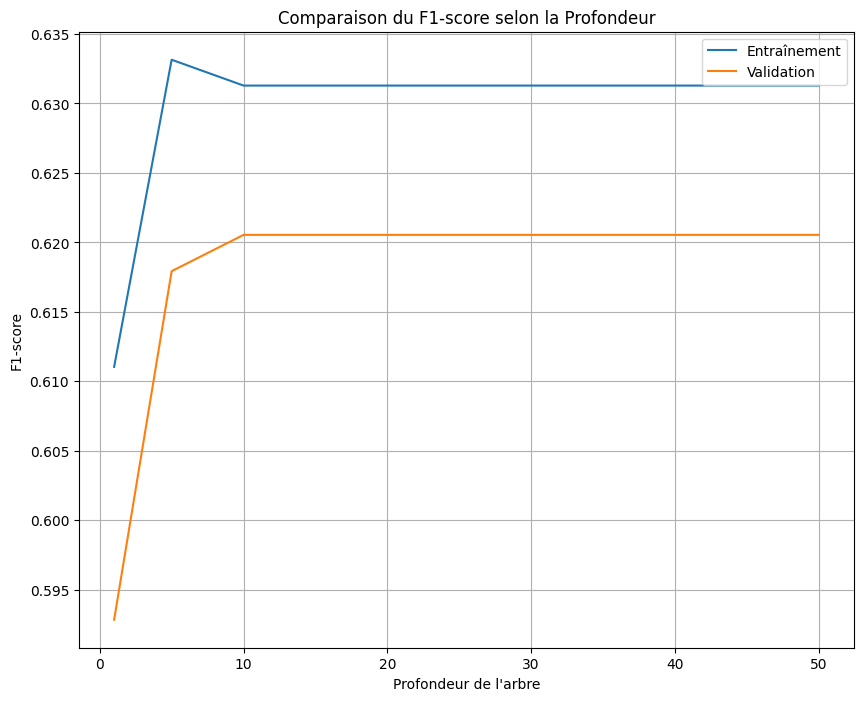

In [ ]:
# Exercice 3-2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

def plot_depth_graph(depths, X_train, y_train, X_val, y_val_true, n_trees=50, leaf_proportion=0.05):
    # Initialisation de la figure
    plt.figure(figsize=(10, 8))

    # Initialisation des listes pour stocker les résultats
    f1_scores_train = []
    f1_scores_val = []

    # Boucle sur les profondeurs
    for depth in depths:
        # Création de la forêt avec poids équilibrés et la profondeur spécifiée
        forest = RandomForestClassifier(n_estimators=n_trees, criterion='gini', max_depth=depth,
                                        min_samples_leaf=int(len(X_train) * leaf_proportion),
                                        class_weight='balanced', random_state=42)
        forest.fit(X_train, y_train)

        # Prédiction sur l'ensemble d'entraînement
        y_train_pred_forest = forest.predict(X_train)
        f1_train = f1_score(y_train, y_train_pred_forest, pos_label='oui')
        f1_scores_train.append(f1_train)

        # Prédiction sur l'ensemble de validation
        y_val_pred_forest = forest.predict(X_val)
        f1_val = f1_score(y_val_true, y_val_pred_forest, pos_label='oui')
        f1_scores_val.append(f1_val)

    # Conversion des listes en tableaux numpy pour un accès plus facile
    f1_scores_train = np.array(f1_scores_train)
    f1_scores_val = np.array(f1_scores_val)

    # Tracer les courbes d'entraînement et de validation
    plt.plot(depths, f1_scores_train, label='Entraînement')
    plt.plot(depths, f1_scores_val, label='Validation')

    # Configuration du graphique
    plt.title('Comparaison du F1-score selon la Profondeur')
    plt.xlabel('Profondeur de l\'arbre')
    plt.ylabel('F1-score')
    plt.grid(True)
    plt.legend()
    plt.show()

# Profondeurs à tester
depths_to_test = [1,5, 10, 15, 20, 25, 30,35,40,45,50]

# Appel de la fonction pour tracer le graphique
plot_depth_graph(depths_to_test, X_train, y_train, X_val, y_val_true)


3. **Refaire les figures avec des seuils à 0,2% et 0,1% :**
   - On vas refaire les figures de la consigne 3.1 avec des seuils de 0,2% et 0,1%.

Le point maximal (0.6587) est atteint par la forêt 'Forêt de 50 arbres, Seuil 0.2%' avec un seuil de 0.2% et un nombre d'arbres de 20.


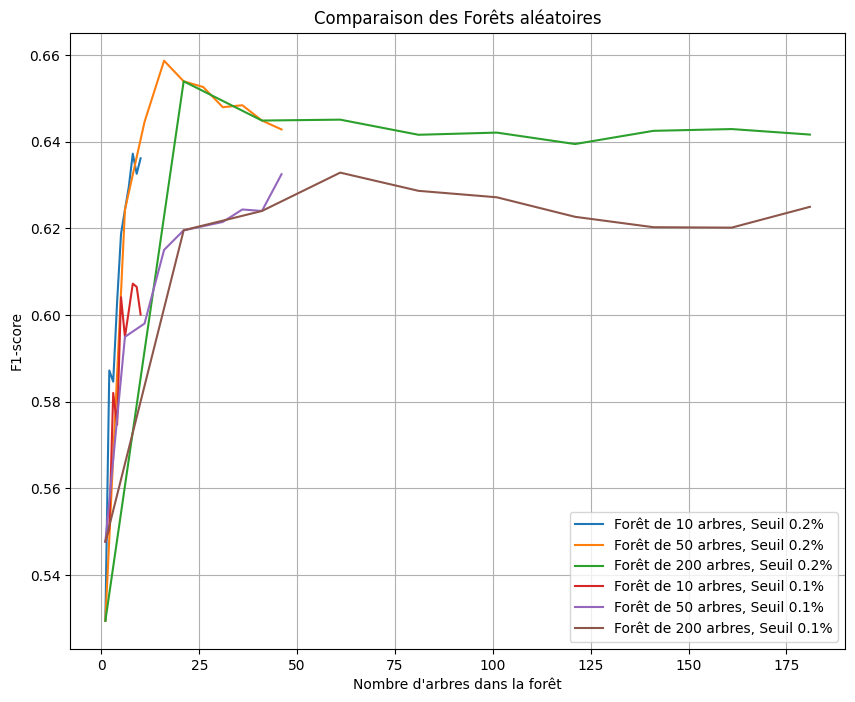

In [ ]:
#Exercice 3-3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

def plot_forest_graph(param_combinations, X_train, y_train, X_val, y_val_true):
    # Initialisation de la figure
    plt.figure(figsize=(10, 8))

    max_point = 0  # Pour stocker le point maximal
    best_forest = None
    best_threshold = None
    best_n_trees = None

    # Boucle sur les combinaisons de paramètres
    for n_estimators, leaf_proportion, title in param_combinations:
        # Initialisation des listes pour stocker les résultats
        f1_scores_forest = []

        # Augmentation du pas pour réduire le nombre d'itérations
        step = max(1, n_estimators // 10)

        # Boucle sur le nombre d'arbres dans la forêt
        for n_trees in range(1, n_estimators + 1, step):
            # Création de la forêt avec poids équilibrés
            forest = RandomForestClassifier(n_estimators=n_trees, criterion='gini', min_samples_leaf=int(len(X_train) * leaf_proportion), class_weight='balanced', random_state=42)
            forest.fit(X_train, y_train)
            y_val_pred_forest = forest.predict(X_val)
            f1_forest = f1_score(y_val_true, y_val_pred_forest, pos_label='oui')
            f1_scores_forest.append(f1_forest)

        # Conversion de la liste en tableau numpy pour un accès plus facile
        f1_scores_forest = np.array(f1_scores_forest)

        # Trouver le point maximal
        max_index = np.argmax(f1_scores_forest)
        max_point_current = f1_scores_forest[max_index]

        # Si le point maximal actuel est supérieur au point maximal précédent
        if max_point_current > max_point:
            max_point = max_point_current
            best_forest = title
            best_threshold = leaf_proportion
            best_n_trees = (max_index + 1) * step  # Ajout pour obtenir le nombre d'arbres

        # Tracer la courbe pour la combinaison de paramètres actuelle
        plt.plot(range(1, n_estimators + 1, step), f1_scores_forest, label=title)

    # Afficher la légende et configurer le graphique
    plt.title('Comparaison des Forêts aléatoires')
    plt.xlabel('Nombre d\'arbres dans la forêt')
    plt.ylabel('F1-score')
    plt.grid(True)
    plt.legend()

    # Afficher la phrase avec le point maximal
    print(f"Le point maximal ({max_point:.4f}) est atteint par la forêt '{best_forest}' avec un seuil de {best_threshold * 100}% et un nombre d'arbres de {best_n_trees}.")
    plt.show()

# Combinaisons de paramètres
param_combinations = [(10, 0.002, 'Forêt de 10 arbres, Seuil 0.2%'),
                      (50, 0.002, 'Forêt de 50 arbres, Seuil 0.2%'),
                      (200, 0.002, 'Forêt de 200 arbres, Seuil 0.2%'),
                      (10, 0.001, 'Forêt de 10 arbres, Seuil 0.1%'),
                      (50, 0.001, 'Forêt de 50 arbres, Seuil 0.1%'),
                      (200, 0.001, 'Forêt de 200 arbres, Seuil 0.1%')]

# Appel de la fonction pour tracer le graphique
plot_forest_graph(param_combinations, X_train, y_train, X_val, y_val_true)


Sur le graphique, on voit que le point maximal (0.6587) est atteint par la forêt 'Forêt de 50 arbres, Seuil 0.2%'. Nous allons utiliser ces informations pour configurer notre evaluation finale

4. **Choix du classifieur définitif et évaluation :**
   - Nous allons choisir la configuration du classifieur définitif.
   - et Entraîner le classifieur définitif et enfin réaliser l'évaluation définitive.
   - Enfin vas re comparez sa performance avec celle de l'arbre complet construit au début.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#Exercice 3-5
# Extraction des features et de la target de l'ensemble de test
X_test = df_test.drop('PluieDemain', axis=1)
y_test_true = df_test['PluieDemain']

# Configuration finale
n_trees_final = 50
leaf_proportion_final = 0.002

final_classifier = RandomForestClassifier(
    n_estimators=n_trees_final,
    criterion='gini',
    min_samples_leaf=int(len(X_train) * leaf_proportion_final),
    class_weight='balanced',
    random_state=42
)

# Entraînement du classifieur final sur l'ensemble d'entraînement complet
final_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_test_pred_final = final_classifier.predict(X_test)

# Affichage du rapport de classification pour le classifieur final sur l'ensemble de test
print("Rapport de classification pour le classifieur final sur l'ensemble de test :")
print(classification_report(y_test_true, y_test_pred_final))


Rapport de classification pour le classifieur final sur l'ensemble de test :
              precision    recall  f1-score   support

         non       0.91      0.88      0.90      2687
         oui       0.59      0.68      0.63       699

    accuracy                           0.84      3386
   macro avg       0.75      0.78      0.76      3386
weighted avg       0.85      0.84      0.84      3386



La premiere evaluation nous donner un resultat de 0.81. Celui ci nous donne un resultat de 0.83.

5. **Calcul de l'importance des variables :**
   - On as calculer ici l'importance des variables selon le classifieur définitif.
   - Enfin on vas proposer une représentation graphique de l'importance des variables.

Importance des variables :
Variable 10: 0.2319843577985264
Variable 5: 0.1711064255680641
Variable 14: 0.08158823069826798
Variable 12: 0.06716026090027037
Variable 3: 0.0651432601362949
Variable 11: 0.06444021461421255
Variable 6: 0.06368318401477266
Variable 9: 0.03828933004966791
Variable 13: 0.03086809344579367
Variable 16: 0.030667994563006257
Variable 1: 0.026699777354816892
Variable 2: 0.026067611034437225
Variable 15: 0.022546498871237813
Variable 4: 0.022309408661161514
Variable 8: 0.019746662357524453
Variable 7: 0.014754468432834506
Variable 17: 0.012201176437059924
Variable 18: 0.010743045062050895


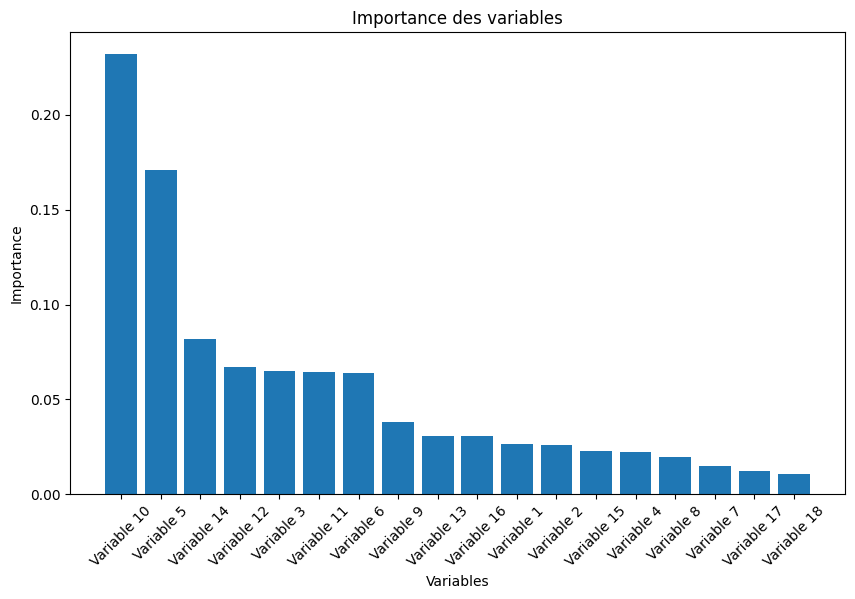

In [ ]:
#Exercice 3-5
import numpy as np
import matplotlib.pyplot as plt

# Calcul de l'importance des variables
importances = final_classifier.feature_importances_

# Indices des variables, triées par importance décroissante
indices = np.argsort(importances)[::-1]

# Noms des variables
feature_names = [f"Variable {i+1}" for i in range(X_train.shape[1])]

# Affichage de l'importance de chaque variable
print("Importance des variables :")
for f in range(X_train.shape[1]):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")

# Représentation graphique de l'importance des variables
plt.figure(figsize=(10, 6))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()


Le graphique montre l'importance des différentes variables dans un modèle de machine learning. L'axe horizontal représente les variables, et l'axe vertical représente leur importance. Les variables les plus importantes sont celles qui ont le plus d'impact sur la prédiction du modèle.

Dans ce graphique, les variables les plus importantes sont les suivantes :

Variable 10 : Cette variable est très importante, avec une importance de 0,2. Elle est probablement la variable la plus importante du modèle.
Variable 5 : Cette variable est également très importante, avec une importance de 0,15. Elle est probablement la deuxième variable la plus importante du modèle.
Variable 14 : Cette variable est importante, avec une importance de 0,1. Elle est probablement la troisième variable la plus importante du modèle.
Les autres variables sont moins importantes, avec une importance inférieure à 0,1.